# How to install and run matlab kernels in jupyter

## First, install the Matlab API for python
In a terminal, run:  
`cd /Applications/MATLAB_R2018a/extern/engines/python`  
`python setup.py install`

## Second, install matlab_kernel
`pip install matlab_kernel`

The next time you run `jupyter notebook` or`jupyter lab` you will see the option to create matlab notebooks


In [1]:
x = randn(5,1)


x =

    0.5377
    1.8339
   -2.2588
    0.8622
    0.3188



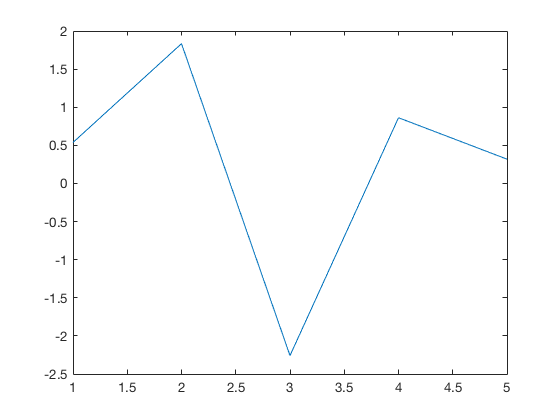

In [2]:
plot(x)

### Bit more testing

In [18]:
y = [x',nan;nan,x']


y =

    0.5377    1.8339   -2.2588    0.8622    0.3188       NaN
       NaN    0.5377    1.8339   -2.2588    0.8622    0.3188



In [20]:
y(find(isnan(y))) = 0;
y


y =

    0.5377    1.8339   -2.2588    0.8622    0.3188         0
         0    0.5377    1.8339   -2.2588    0.8622    0.3188



## Noise rejection exampe

In [3]:
load '/Volumes/05/Peron_2015/Peron_ssc_events/an197522/an197522_2013_03_07.mat'
ca = dat.timeSeriesArrayHash.value{1,2}.valueMatrix;
ca(find(isnan(ca))) = 0;
A = corrcoef(ca');

In [24]:
noise_reject_Peron


fname =

    'Peron_example'



In [26]:
Rejection


Rejection = 

  struct with fields:

      ixSignal: [0x1 double]
       ixNoise: [1548x1 double]
        mModel: [1548x1 double]
       CIModel: [1548x1 double]
    Difference: [1x1 struct]
       NegDiff: [1x1 struct]
    ixNegative: [1548x1 double]



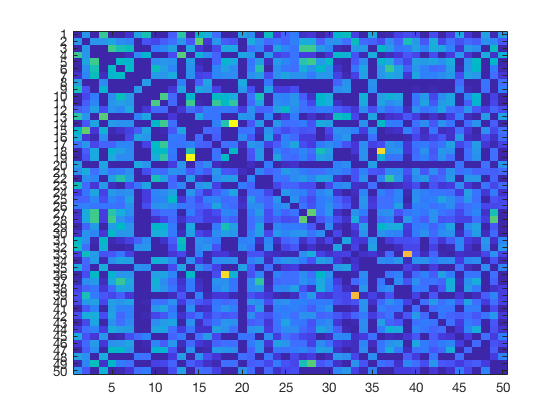

In [31]:
%% Image plot of A, with labels
k = sum(Data.A);
[~,iK] = sort(k,'descend');   % plot sorted into degree order
% cmap = brewermap(10,'Greys');
figure; 
imagesc(Data.A(iK(1:50),iK(1:50))); %colormap(cmap);
set(gca,'Ytick',1:length(Data.ixRetain));
% set(gca,'Yticklabel',Data.nodelabels(iK,:),'Fontsize',fontsize);

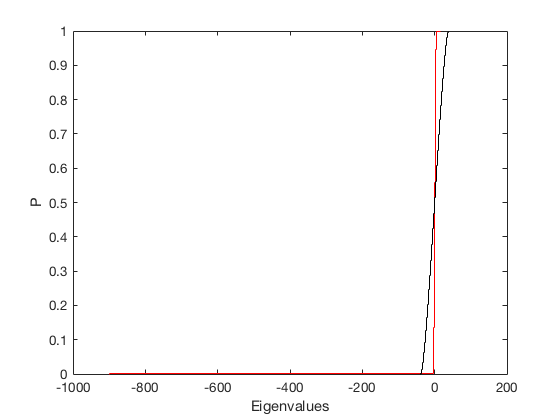

In [28]:
%% compare eigenvalues of data and model
B = Data.A - Data.ExpA;  % modularity matrix using chosen null model
Edata = eig(B);
[fdata,xdata] = ecdf(Edata);
[fmodel,xmodel] = ecdf(Data.Emodel(:));
figure
stairs(xdata,fdata,'r'); hold on
stairs(xmodel,fmodel,'k')
ylabel('P')
xlabel('Eigenvalues')


In [ ]:
[Data.Emodel,diagnostics,Vmodel,Data.ExpA] = RndPoissonConfigModel(Data.A,pars.N,pars.C,optionsModel)


Data = 

  struct with fields:

                   A: [1548x1548 double]
            ixRetain: [1x1548 double]
               Comps: [1x1552 double]
           CompSizes: [1548 1 1 1 1]
              Emodel: [1548x100 double]
                ExpA: [1548x1548 double]
              Dspace: [1548x0 double]
                  Dn: 0
              EigEst: [37.8765 0]
              Nspace: [1548x1 double]
                Dneg: 1
             NEigEst: [-37.8848 0]
               PosDn: 914
             Asignal: []
        Asignal_comp: []
         SignalComps: [1x0 double]
    SignalComp_sizes: []
       ixSignal_comp: []
      ixSignal_Final: []
     ixSignal_Leaves: []
       Asignal_final: []


diagnostics = 

  100x1 struct array with fields:

    conversion
    sAp
    minW
    maxW
    dS
    dSN
    dmax


Vmodel(:,:,1) =

  Columns 1 through 7

    0.0258    0.0033   -0.0282   -0.0027   -0.0263   -0.0055    0.0224
    0.0214   -0.0224   -0.0185    0.0395   -0.0136   -0.0023   -0.0166
 

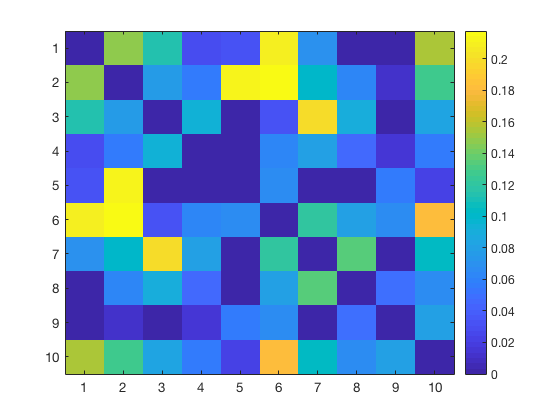

In [22]:
imagesc(Data.A(1:10,1:10)); colorbar

In [23]:
numel(find(Data.A<0))


ans =

     0

